In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import datetime
import time
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from PIL import ImageTk, Image
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from ipywidgets import DatePicker
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('Istanbul Weather Data.csv')

In [4]:
print(df.head())
print(df.shape)

     DateTime             Condition  Rain  MaxTemp  MinTemp   SunRise  \
0  02.09.2019         Partly cloudy   0.0       27       22  06:32:00   
1  01.09.2019         Partly cloudy   0.0       27       22  06:31:00   
2  31.08.2019  Patchy rain possible   0.5       26       22  06:30:00   
3  30.08.2019         Partly cloudy   0.0       27       22  06:29:00   
4  29.08.2019         Partly cloudy   0.0       27       23  06:27:00   

     SunSet MoonRise   MoonSet  AvgWind  AvgHumidity  AvgPressure  
0  19:37:00  9:52:00  21:45:00       23           66         1012  
1  19:38:00  8:37:00  21:13:00       21           66         1011  
2  19:40:00  7:21:00  20:40:00       22           63         1015  
3  19:42:00   6:4:00   20:5:00       20           64         1016  
4  19:43:00  4:47:00  19:26:00       24           61         1015  
(3896, 12)


In [5]:
df=df.dropna(axis=1, how='all')
null_values=df.isnull().sum()
print(null_values.sum())

263


In [6]:
for colName in df.columns:
    df[colName] = df[colName].fillna(df[colName].value_counts().index[0])

In [8]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format= '%d.%m.%Y').values.astype(np.int64)
df["SunRise"] = df['SunRise'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["SunSet"] = df['SunSet'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["MoonRise"] = df['MoonRise'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["MoonSet"] = df['MoonSet'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [9]:
df.loc[df["Condition"]=="Torrential rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Heavy rain at times","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Light rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Moderate or heavy rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Moderate or heavy rain with thunder","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Sunny","Kategori"]="Gunesli"
df.loc[df["Condition"]=="Partly cloudy","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Cloudy","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Overcast","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Patchy rain possible","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light rain","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Patchy light rain with thunder","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate rain","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light drizzle","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light sleet","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate rain at times","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Patchy light drizzle","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate snow","Kategori"]="Karlı"
df.loc[df["Condition"]=="Moderate or heavy snow showers","Kategori"]="Karlı"
df.loc[df["Condition"]=="Moderate or heavy sleet","Kategori"]="Karlı"
df.loc[df["Condition"]=="Fog","Kategori"]="Sisli"
df.loc[df["Condition"]=="Mist","Kategori"]="Sisli"

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df["Kategori"])
df["Kategori"]=le.transform(df["Kategori"])

In [11]:
y = df['Kategori'].values
X = df.drop(columns=['Condition','Kategori']).values

In [12]:
df['Kategori'].value_counts()

1    2242
0    1466
2      86
6      53
4      38
5       7
3       4
Name: Kategori, dtype: int64

In [13]:
select = SelectKBest(mutual_info_regression, k = 5)
select.fit(X, y)
select.get_support() 
df_selectedFeature = df[df.drop(columns=['Kategori','Condition']).columns[select.get_support()]]
print("Feature Selection sonucunda seçilen değişkenler")
print(df_selectedFeature.columns)

Feature Selection sonucunda seçilen değişkenler
Index(['DateTime', 'Rain', 'MaxTemp', 'MinTemp', 'AvgHumidity'], dtype='object')


In [14]:
y = df['Kategori'].values
X = df_selectedFeature.values

In [15]:
print(X.shape)
print(y.shape)

(3896, 5)
(3896,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3116, 5)
(3116,)
(780, 5)
(780,)


In [18]:
accuracy_values=[]

In [19]:
precision_values=[]

In [20]:
coef_values=[]

In [21]:
fscore_values=[]

In [35]:
print('Decision Tree')
dtc = DecisionTreeClassifier(random_state=1)

parameters={'criterion': ["gini", "entropy", "log_loss"]}

model = GridSearchCV(dtc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix1 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix1)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix1 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix1)

decisiontree_accuracy=accuracy
accuracy_values.append(decisiontree_accuracy)

decisiontree_precision=precision
precision_values.append(decisiontree_precision)

decisiontree_coef=coef
coef_values.append(decisiontree_coef)

decisiontree_fscore=fscore
fscore_values.append(decisiontree_fscore)
    
    
#decisiontree_function()

date_str = input("Date değerini girin: ")
rain = float(input("Rain değerini girin: "))
max_temp = float(input("MaxTemp değerini girin: "))
min_temp = float(input("MinTemp değerini girin: "))
avghum = float(input("AvgHum değerini girin: "))

date = pd.to_datetime(date_str, format='%d.%m.%Y')
date_int64 = date.value  

X_tahmin = np.array([[date_int64, rain, max_temp, min_temp, avghum]])

tahmin = model.predict(X_tahmin)

if tahmin == 0:
    print("Tahmin edilen hava durumu: siddetli yagmurlu")
if tahmin == 1:
    print("Tahmin edilen hava durumu: gunesli")
if tahmin == 2:
    print("Tahmin edilen hava durumu: bulutlu")
if tahmin == 3:
    print("Tahmin edilen hava durumu: hafif yagmurlu")
if tahmin == 4:
    print("Tahmin edilen hava durumu: karli")
if tahmin == 5:
    print("Tahmin edilen hava durumu: sisli")




C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

Decision Tree
Fitting 4 folds for each of 3 candidates, totalling 12 fits
TRAIN RESULTS
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall 1.000
Train F1 Score: 1.000
Train Correlation Coefficient 1.000
Confusion matrix:
[[1174    0    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0    0   74    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0   32    0    0]
 [   0    0    0    0    0    6    0]
 [   0    0    0    0    0    0   43]]
TEST RESULTS
Test Accuracy: 0.700
Test Precision: 0.792
Test Recall 0.786
Train F1 Score: 0.703
Test Correlation Coefficient 0.106
Confusion matrix:
[[180  90  13   4   0   5]
 [ 89 361   1   1   0   7]
 [  6   2   4   0   0   0]
 [  5   0   0   1   0   0]
 [  1   0   0   0   0   0]
 [  5   3   1   1   0   0]]


Date değerini girin:  30.07.2025
Rain değerini girin:  0.2
MaxTemp değerini girin:  37
MinTemp değerini girin:  35
AvgHum değerini girin:  35


Tahmin edilen hava durumu: bulutlu


In [22]:

print('Random Forest')
rfc = RandomForestClassifier()

parameters={'n_estimators': [10, 25, 50],
                   'criterion': ["gini", "entropy", "log_loss"],
                   'max_features': ["sqrt", "log2"]}

model = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix2 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix2)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix2 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix2)

randomforest_accuracy=accuracy
accuracy_values.append(randomforest_accuracy)

randomforest1_precision=precision
precision_values.append(randomforest1_precision)

randomforest1_coef=coef
coef_values.append(randomforest1_coef)

randomforest1_fscore=fscore
fscore_values.append(randomforest1_fscore)

#randomforest1_function()

Random Forest
Fitting 4 folds for each of 18 candidates, totalling 72 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\jo

TRAIN RESULTS
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall 1.000
Train F1 Score: 1.000
Train Correlation Coefficient 1.000
Confusion matrix:
[[1174    0    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0    0   74    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0   32    0    0]
 [   0    0    0    0    0    6    0]
 [   0    0    0    0    0    0   43]]
TEST RESULTS
Test Accuracy: 0.778
Test Precision: 0.841
Test Recall 0.832
Train F1 Score: 0.773
Test Correlation Coefficient 0.225
Confusion matrix:
[[218  67   3   0   0   4]
 [ 77 382   0   0   0   0]
 [  3   2   7   0   0   0]
 [  3   0   3   0   0   0]
 [  1   0   0   0   0   0]
 [  6   3   1   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:

print('Random Forest')
rfc = RandomForestClassifier()

parameters={'n_estimators': [200, 350, 500],
                   'criterion': ["gini", "entropy", "log_loss"],
                   'max_features': ["sqrt", "log2"]}

model = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix3 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix3)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix3 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix3)

randomforest2_accuracy=accuracy
accuracy_values.append(randomforest2_accuracy)

randomforest2_precision=precision
precision_values.append(randomforest2_precision)

randomforest2_coef=coef
coef_values.append(randomforest2_coef)

randomforest2_fscore=fscore
fscore_values.append(randomforest2_fscore)


    
    
#randomforest2_function()

Random Forest
Fitting 4 folds for each of 18 candidates, totalling 72 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\jo

TRAIN RESULTS
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall 1.000
Train F1 Score: 1.000
Train Correlation Coefficient 1.000
Confusion matrix:
[[1174    0    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0    0   74    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0   32    0    0]
 [   0    0    0    0    0    6    0]
 [   0    0    0    0    0    0   43]]
TEST RESULTS
Test Accuracy: 0.788
Test Precision: 0.838
Test Recall 0.847
Train F1 Score: 0.781
Test Correlation Coefficient 0.291
Confusion matrix:
[[219  68   3   0   0   2]
 [ 70 389   0   0   0   0]
 [  2   3   7   0   0   0]
 [  3   0   3   0   0   0]
 [  1   0   0   0   0   0]
 [  5   4   1   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print('MLP')
mlc = MLPClassifier(random_state=1, early_stopping=True)
# MLP
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],
                   'hidden_layer_sizes': [(10, 5), (15, 10), (20, 15), (100,), (100, 50, 25)],
                   'activation': ["logistic", "relu", "tanh"]}

model = GridSearchCV(mlc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix4 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix4)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix4 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix4)

mlp_accuracy=accuracy
accuracy_values.append(mlp_accuracy)

mlp_precision=precision
precision_values.append(mlp_precision)

mlp_coef=coef
coef_values.append(mlp_coef)

mlp_fscore=fscore
fscore_values.append(mlp_fscore)

#mlp_function()

MLP
Fitting 4 folds for each of 45 candidates, totalling 180 fits
TRAIN RESULTS
Train Accuracy: 0.572
Train Precision: 0.572
Train Recall 1.000
Train F1 Score: 0.417
Train Correlation Coefficient nan
Confusion matrix:
[[   0 1174    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0   74    0    0    0    0    0]
 [   0    4    0    0    0    0    0]
 [   0   32    0    0    0    0    0]
 [   0    6    0    0    0    0    0]
 [   0   43    0    0    0    0    0]]
TEST RESULTS
Test Accuracy: 0.588
Test Precision: 0.588
Test Recall 1.000
Train F1 Score: 0.436
Test Correlation Coefficient nan
Confusion matrix:
[[  0 292   0   0   0   0]
 [  0 459   0   0   0   0]
 [  0  12   0   0   0   0]
 [  0   6   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0  10   0   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_c

In [25]:
print('MLP2')
mlc = MLPClassifier(random_state=1, early_stopping=True)
# MLP
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],
                   'hidden_layer_sizes': [(50, 25), (75, 50), (100, 75), (100, 75, 50), (50, 50, 25), (100, 100, 50)],
                   'activation': ["logistic", "relu", "tanh"]}

model = GridSearchCV(mlc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix5 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix5)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix5 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix5)

mlp_accuracy=accuracy
accuracy_values.append(mlp_accuracy)

mlp_precision=precision
precision_values.append(mlp_precision)

mlp_coef=coef
coef_values.append(mlp_coef)

mlp_fscore=fscore
fscore_values.append(mlp_fscore)



MLP2
Fitting 4 folds for each of 54 candidates, totalling 216 fits
TRAIN RESULTS
Train Accuracy: 0.572
Train Precision: 0.572
Train Recall 1.000
Train F1 Score: 0.417
Train Correlation Coefficient nan
Confusion matrix:
[[   0 1174    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0   74    0    0    0    0    0]
 [   0    4    0    0    0    0    0]
 [   0   32    0    0    0    0    0]
 [   0    6    0    0    0    0    0]
 [   0   43    0    0    0    0    0]]
TEST RESULTS
Test Accuracy: 0.588
Test Precision: 0.588
Test Recall 1.000
Train F1 Score: 0.436
Test Correlation Coefficient nan
Confusion matrix:
[[  0 292   0   0   0   0]
 [  0 459   0   0   0   0]
 [  0  12   0   0   0   0]
 [  0   6   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0  10   0   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_c

In [26]:
def decisiontree_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Decision Tree")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix1, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


    
def randomforest1_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Random Forest 1")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix2, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


    
def randomforest2_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Random Forest 2")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix3, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


    
    
def mlp_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Multi Layer Perceptron")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix4, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()

def mlp2_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Multi Layer Perceptron")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix4, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()



In [27]:
algorithm_names=["Desicion Tree", "Random Forest 1", "Random Forest 2", "MLP", "MLP2"]

In [28]:
print(accuracy_values)

[0.7, 0.7782051282051282, 0.7884615384615384, 0.5884615384615385, 0.5884615384615385]


In [29]:
print(precision_values)

[array([0.62937063, 0.79166667, 0.21052632, 0.14285714, 0.        ,
       0.        ]), array([0.70779221, 0.84140969, 0.5       , 0.        , 0.        ,
       0.        ]), array([0.73      , 0.83836207, 0.5       , 0.        , 0.        ,
       0.        ]), array([0.        , 0.58846154, 0.        , 0.        , 0.        ,
       0.        ]), array([0.        , 0.58846154, 0.        , 0.        , 0.        ,
       0.        ])]


In [30]:
print(coef_values)

[array([[1.        , 0.10647366],
       [0.10647366, 1.        ]]), array([[1.        , 0.22524431],
       [0.22524431, 1.        ]]), array([[1.        , 0.29141919],
       [0.29141919, 1.        ]]), array([[nan, nan],
       [nan,  1.]]), array([[nan, nan],
       [nan,  1.]])]


In [31]:
print(fscore_values)

[array([0.62283737, 0.78907104, 0.25806452, 0.15384615, 0.        ,
       0.        ]), array([0.72666667, 0.83680175, 0.53846154, 0.        , 0.        ,
       0.        ]), array([0.73986486, 0.84290358, 0.53846154, 0.        , 0.        ,
       0.        ]), array([0.       , 0.7409201, 0.       , 0.       , 0.       , 0.       ]), array([0.       , 0.7409201, 0.       , 0.       , 0.       , 0.       ])]


In [32]:
def comparison():

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(algorithm_names, accuracy_values)
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy Values")
    plt.title("Accuracy Values of Machine Learning Algorithms")

    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Accuracy Values of Machine Learning Algorithms")
    window.geometry("700x500")

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [33]:
def decisiontreevalues():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Decision Tree Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[0])
    precision_text = "Precision: " + str(precision_values[1][0])
    coef_text = "Correlation Coefficient: " + str(coef_values[0][0][1])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [34]:
def randomforest1values():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Random Forest 1 Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[1])
    precision_text = "Precision: " + str(precision_values[1][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[1][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [35]:
def randomforest2values():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Random Forest 2 Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[2])
    precision_text = "Precision: " + str(precision_values[2][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[2][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [36]:
def mlpvalues():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("MLP Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[3])
    precision_text = "Precision: " + str(precision_values[3][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[3][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [37]:
def mlp2values():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("MLP Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[4])
    precision_text = "Precision: " + str(precision_values[4][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[4][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

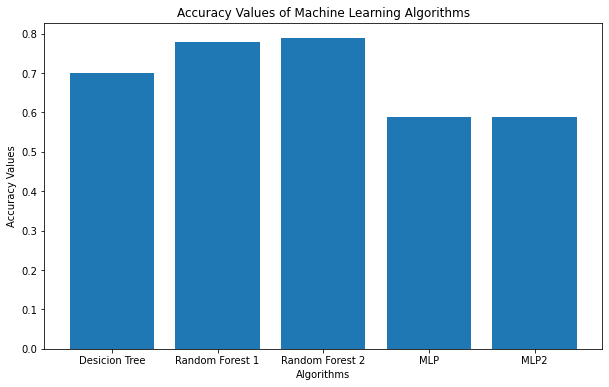

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_values)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Values")
plt.title("Accuracy Values of Machine Learning Algorithms")
plt.show()

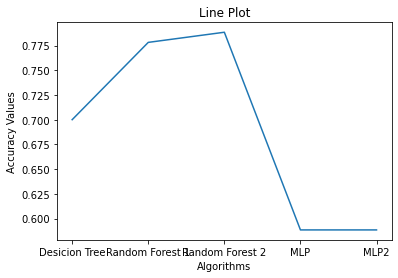

In [39]:
plt.plot(algorithm_names, accuracy_values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Values')
plt.title('Line Plot')
plt.show()

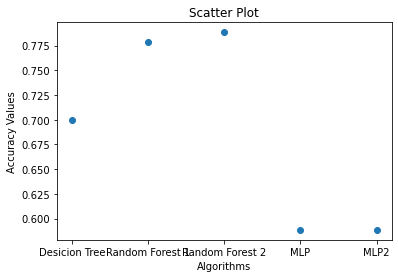

In [40]:
plt.scatter(algorithm_names, accuracy_values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Values')
plt.title('Scatter Plot')
plt.show()

In [41]:
def get_row_info(selected_date):
    try:
        row = df[df['DateTime'] == selected_date]  # Seçilen tarihe göre veri çerçevesinde ilgili satırı seçiyoruz

        if not row.empty:
            # Satır bilgilerini gösteren bir mesaj kutusu oluşturuyoruz
            message = f"DateTime: {row['DateTime'].values[0]}\nCondition: {row['Condition'].values[0]}\nRain: {row['Rain'].values[0]}\nMaxTemp: {row['MaxTemp'].values[0]}\nMinTemp: {row['MinTemp'].values[0]}\nSunRise: {row['SunRise'].values[0]}\nSunSet: {row['SunSet'].values[0]}\nMoonRise: {row['MoonRise'].values[0]}\nMoonSet: {row['MoonSet'].values[0]}\nAvgWind: {row['AvgWind'].values[0]}\nAvgHumidity: {row['AvgHumidity'].values[0]}\nAvgPressure: {row['AvgPressure'].values[0]}\nKategori: {row['Kategori'].values[0]}"
            tk.messagebox.showinfo("Satır Bilgileri", message)
        else:
            tk.messagebox.showwarning("Uyarı", "Seçilen tarihe ait veri bulunamadı.")
    except Exception as e:
        tk.messagebox.showerror("Hata", "Geçerli bir tarih seçin.")

In [42]:
def exit_program():
    window.destroy()

In [44]:
window = tk.Tk()
window.title("WEATHER CONDITION")
window.geometry("400x500")
window.configure(background="lightblue")

label = tk.Label(window, text="Please choose any machine learning algorithm or enter a date", fg="dark blue")
label.place(x=23,y=90)

button10 = tk.Button(window, text="Enter date", command=get_date, relief="groove")
button10.place(x=156,y=111)

button2 = tk.Button(window, text="Decision Tree Heatmap", command=decisiontree_function, relief="groove")
button2.place(x=23,y=200)

button3 = tk.Button(window, text="Random Forest 1 Heatmap", command=randomforest1_function, relief="groove")
button3.place(x=23,y=250)

button4 = tk.Button(window, text="Random Forest 2 Heatmap", command=randomforest2_function, relief="groove")
button4.place(x=23,y=300)

button5 = tk.Button(window, text="MLP 1 Heatmap", command=mlp_function, relief="groove")
button5.place(x=23,y=350)

button5 = tk.Button(window, text="MLP 2 Heatmap", command=mlp_function, relief="groove")
button5.place(x=23,y=400)

button6 = tk.Button(window, text="Comparison of all algorithms", command=comparison, relief ="groove")
button6.place(x=70,y=450)

button7 = tk.Button(window, text="Decision Tree Values", command=decisiontreevalues, relief="groove")
button7.place(x=230,y=200)

button8 = tk.Button(window, text="Random Forest 1 Values", command=randomforest1values, relief="groove")
button8.place(x=230,y=250)

button9 = tk.Button(window, text="Random Forest 2 Values", command=randomforest2values, relief="groove")
button9.place(x=230,y=300)

button9 = tk.Button(window, text="MLP 1 Values", command=mlpvalues, relief="groove")
button9.place(x=230,y=350)

button9 = tk.Button(window, text="MLP 2 Values", command=mlpvalues, relief="groove")
button9.place(x=230,y=400)

button10 = tk.Button(window, text="Exit", command=exit_program, relief="groove")
button10.place(x=280,y=450)

window.mainloop()